# **Rice Image Classification in TF**

### **Nama: Mizwar**

In [ ]:
!wget --no-check-certificate \
    https://www.muratkoklu.com/datasets/vtdhnd09.php \
    -O /tmp/Rice_Image_Dataset.zip

--2022-10-02 09:10:36--  https://www.muratkoklu.com/datasets/vtdhnd09.php
Resolving www.muratkoklu.com (www.muratkoklu.com)... 185.179.25.150
Connecting to www.muratkoklu.com (www.muratkoklu.com)|185.179.25.150|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: Rice_Image_Dataset.zip [following]
--2022-10-02 09:10:38--  https://www.muratkoklu.com/datasets/Rice_Image_Dataset.zip
Reusing existing connection to www.muratkoklu.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 229550800 (219M) [application/zip]
Saving to: ‘/tmp/Rice_Image_Dataset.zip’

/tmp/Rice_Image_Dat 100%[===================>] 218.92M  12.8MB/s    in 19s     

2022-10-02 09:10:57 (11.8 MB/s) - ‘/tmp/Rice_Image_Dataset.zip’ saved [229550800/229550800]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os,shutil
local_zip = '/tmp/Rice_Image_Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/Rice_Image_Dataset'
ar_dir = os.path.join(base_dir,'Arborio')
bas_dir = os.path.join(base_dir, 'Basmati')
ip_dir = os.path.join(base_dir, 'Ipsala')
ja_dir = os.path.join(base_dir, 'Jasmine')
ka_dir = os.path.join(base_dir, 'Karacadag')

In [ ]:
total_arborio = len(os.listdir(ar_dir))
total_basmati = len(os.listdir(bas_dir))
total_ipsala = len(os.listdir(ip_dir))
total_jasmine = len(os.listdir(ja_dir))
total_karacadag = len(os.listdir(ka_dir))

# Mencetak jumlah data 
print("Total Data Arborio Image     : ",total_arborio)
print("Total Data Basmati Image     : ",total_basmati)
print("Total Data Ipsala Image      : ",total_ipsala)
print("Total Data Jasmine Image     : ",total_jasmine)
print("Total Data Karacadag Image   : ",total_karacadag)

Total Data Arborio Image     :  15000
Total Data Basmati Image     :  15000
Total Data Ipsala Image      :  15000
Total Data Jasmine Image     :  15000
Total Data Karacadag Image   :  15000


In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
# Pembuatan Train dan Validation  data generator 
# Untuk augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Ukuran validation 20% dari dataset
val_size = 0.2

Train_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

Validation_datagen = ImageDataGenerator(
    rotation_range = 30,
    brightness_range = [0.2,1.0],
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    rescale = 1./255,
    validation_split = val_size
)

In [ ]:
# Train dan Validation generator  dengan mode categorical
Train_generator = Train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 128,
    shuffle = True,
    subset = "training"
)

Validation_generator = Validation_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 128,
    shuffle = False,
    subset = "validation"
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Pembuatan Model dengan tipe Sequential

model_vanilla = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),

     tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model_vanilla.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vanilla.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_14 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      9248      
                                                                 
 batch_normalization_15 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                      

**Callbacks**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

checkpointer = ModelCheckpoint(filepath='saved_models/model_vanilla.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [ ]:
history1 = model_vanilla.fit(Train_generator, epochs = 40, validation_data = Validation_generator, callbacks=callbacks)

Epoch 1/40
469/469 [==============================] - ETA: 0s - loss: 0.2068 - accuracy: 0.9254
Epoch 1: val_accuracy improved from -inf to 0.20847, saving model to saved_models/model_vanilla.hdf5
469/469 [==============================] - 505s 1s/step - loss: 0.2068 - accuracy: 0.9254 - val_loss: 15.1761 - val_accuracy: 0.2085 - lr: 0.0010
Epoch 2/40
469/469 [==============================] - ETA: 0s - loss: 0.0666 - accuracy: 0.9782
Epoch 2: val_accuracy improved from 0.20847 to 0.67593, saving model to saved_models/model_vanilla.hdf5
469/469 [==============================] - 495s 1s/step - loss: 0.0666 - accuracy: 0.9782 - val_loss: 1.5142 - val_accuracy: 0.6759 - lr: 0.0010
Epoch 3/40
469/469 [==============================] - ETA: 0s - loss: 0.0543 - accuracy: 0.9820
Epoch 3: val_accuracy improved from 0.67593 to 0.91220, saving model to saved_models/model_vanilla.hdf5
469/469 [==============================] - 491s 1s/step - loss: 0.0543 - accuracy: 0.9820 - val_loss: 0.3451 - v

In [ ]:
import matplotlib.pyplot as plt

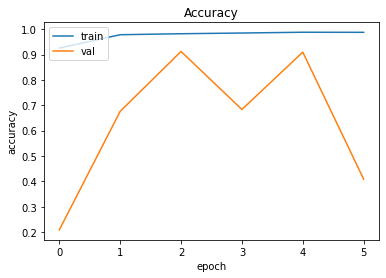

In [ ]:
# Mengambil Nilai Accuracy 
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

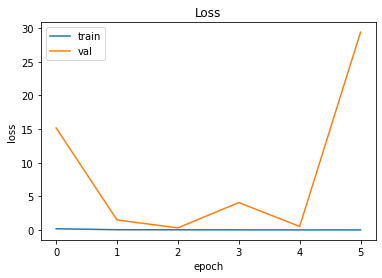

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import warnings
# Menghilangkan Warning
warnings.filterwarnings('ignore')
# Convert Model.
converter = tf.lite.TFLiteConverter.from_keras_model(model_vanilla)
tflite_model = converter.convert()
# Save the model.
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)